In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#các thư viện yêu cầu

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
#đọc dữ liệu

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()
#Mô tả thống kê dữ liệu

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape
#in ra kích thước dữ liệu

(10000, 14)

In [7]:
df.isnull().sum()
#kiểm tra dữ liệu khuyết thiếu

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

=> Không có dữ liệu khuyết thiếu

In [8]:
df.duplicated().sum()
#Kiểm tra dữ liệu bị trùng lặp

0

=> Không có dữ liệu bị trùng lặp

In [9]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
# Mã hóa biến phân loại Geography và Gender bằng One-Hot Encoding

In [10]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [11]:
df.nunique()

RowNumber            10000
CustomerId           10000
Surname               2932
CreditScore            460
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Geography_Germany        2
Geography_Spain          2
Gender_Male              2
dtype: int64

=> Các cột RowNumber, CustomerID, Surname  có tính đa dạng cao, mang tính đặc tù cho từng khách hàng và không liên quan đến việc dự đoán khách hàng có rời bỏ dịch vụ ngân hàng hay không nên có thể bỏ những cột này

In [12]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)


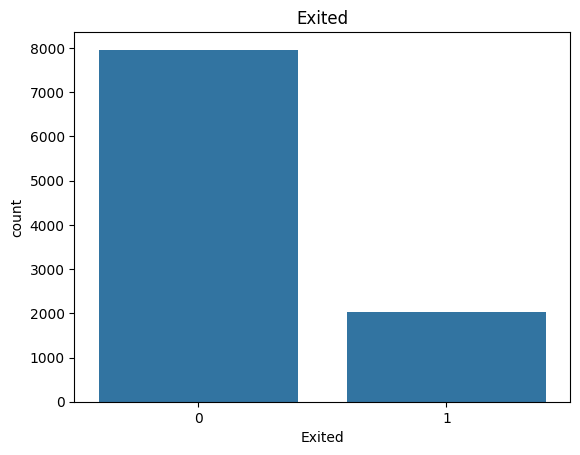

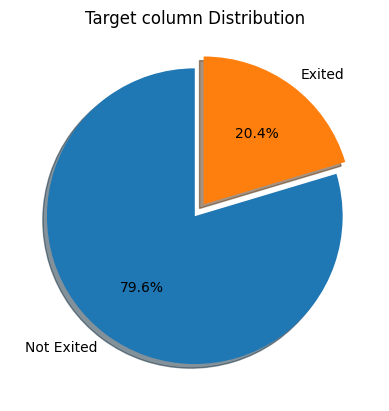

In [13]:
ax=sns.countplot(x=df['Exited'], data=df);
plt.title('Exited')
plt.show()
plt.title('Target column Distribution')
plt.pie(df['Exited'].value_counts(),labels = ['Not Exited', 'Exited'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()
#Vẽ biểu đồ thống kê số lượng khách hàng rời bỏ ngân hàng


In [14]:
cat_features = ['Geography_Spain','Geography_Germany','Gender_Male','NumOfProducts','HasCrCard','IsActiveMember']
num_features = ['Tenure','Balance','EstimatedSalary','Age','CreditScore']

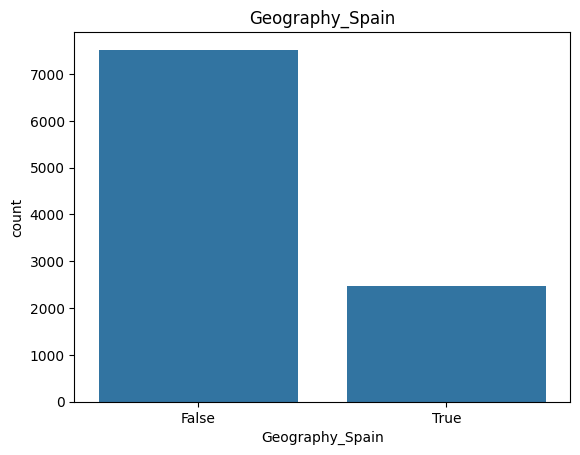

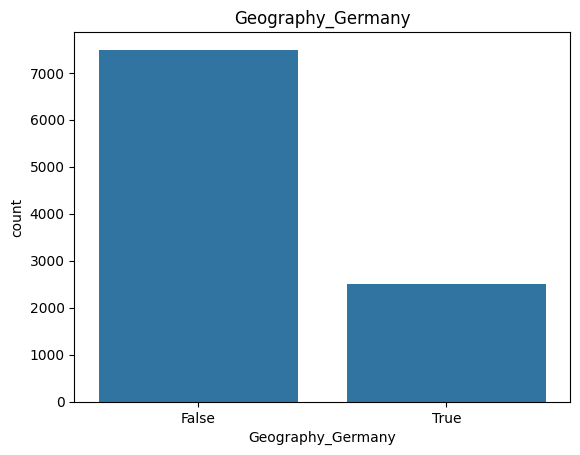

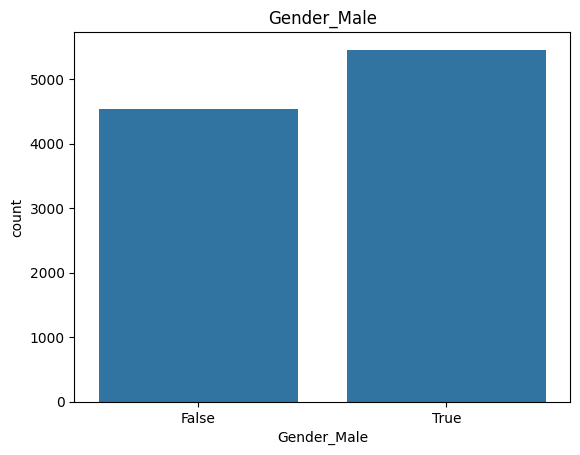

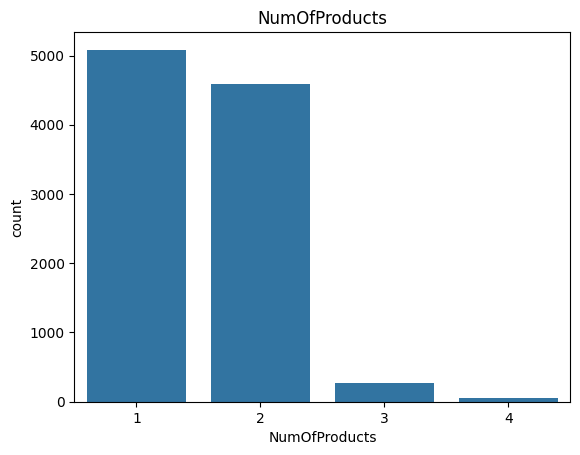

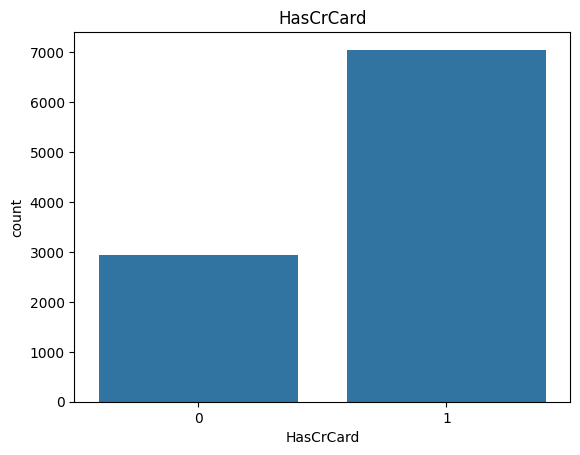

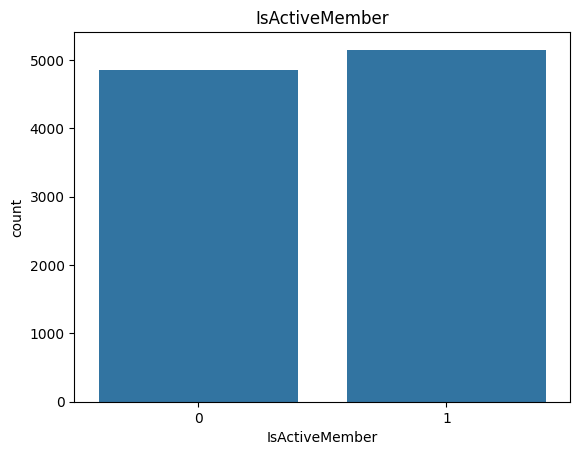

In [15]:
for i in cat_features:
    ax=sns.countplot(x=df[i], data=df);
    plt.title(i)
    plt.show()
# Xem xét mối tương quan giữa biến mục tiêu và các biến phân loại


d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


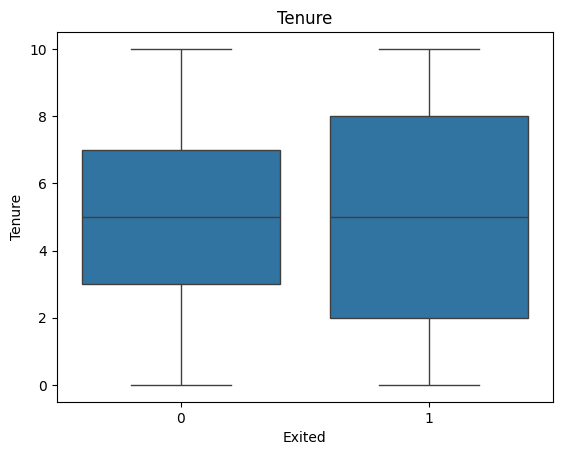

d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


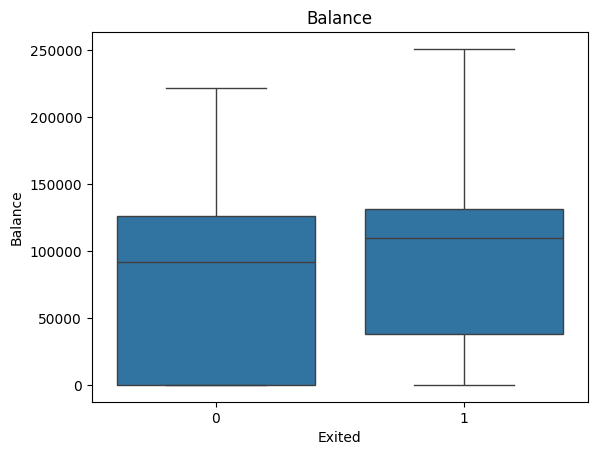

d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


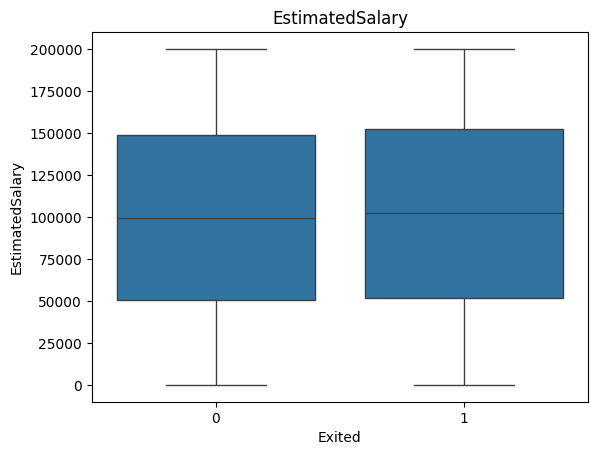

d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


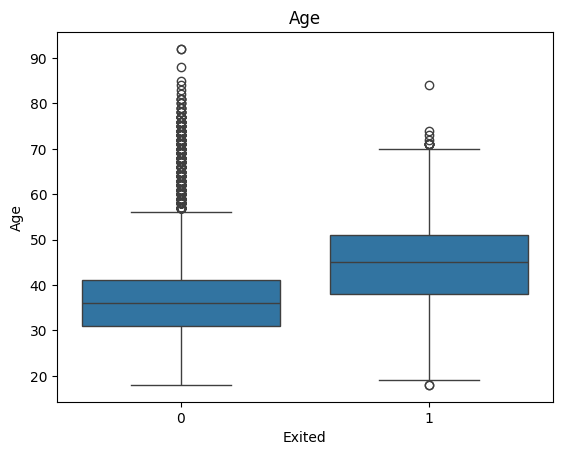

d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


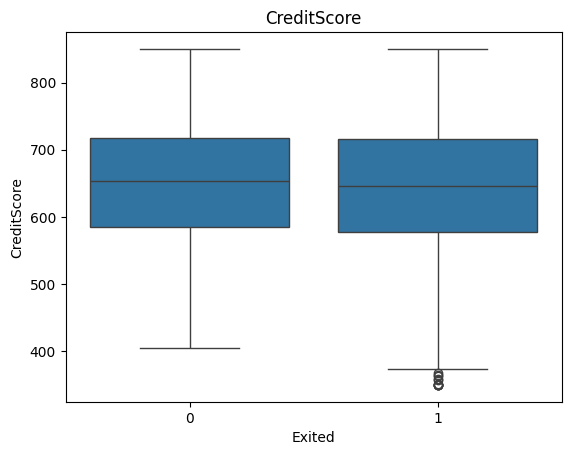

In [16]:
for i in num_features:
    sns.boxplot(x='Exited', y=df[i], data=df)
    plt.title(i)
    plt.show()


In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


**Xây dựng mô hình**

In [19]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop("Exited", axis=1)
y = df.Exited

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Khởi tạo StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lưu trữ kết quả
accuracies = []

# Vòng lặp cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Xử lý dữ liệu mất cân bằng bằng ADASYN
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Tinh chỉnh siêu tham số bằng RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 10),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 20),
        'max_features': ['auto', 'sqrt', 'log2']
    }

    # Khởi tạo RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)

    random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train_resampled, y_train_resampled)

    best_model = random_search.best_estimator_

    # Dự đoán và đánh giá
    y_pred = best_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\Yến Vy\Jupyternotebook\.conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

In [20]:
# In kết quả
print(f'Accuracy Scores for each fold: {accuracies}')
print(f'Mean Accuracy: {sum(accuracies) / len(accuracies)}')

Accuracy Scores for each fold: [0.8285, 0.8155, 0.816, 0.8185, 0.839]
Mean Accuracy: 0.8234999999999999
